# JPMorgan Chase & Co. Discussion Analysis

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("discussion_df.csv")

# Show basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   speaker  18 non-null     object
 1   role     18 non-null     object
 2   company  18 non-null     object
 3   content  18 non-null     object
 4   year     18 non-null     int64 
 5   quarter  18 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 996.0+ bytes


In [ ]:
# Preview the first few rows
df.head()


,speaker,role,company,content,year,quarter
0,Jeremy Barnum,Chief Financial Officer,JPMorgan Chase & Co.,"Thanks, operator. Good morning, everyone. The ...",2022,1
1,Jeremy Barnum,Chief Financial Officer,JPMorgan Chase & Co.,"Thanks, operator. Good morning, everyone. The ...",2022,2
2,Jeremy Barnum,Chief Financial Officer,JPMorgan Chase & Co.,"Thank you very much. Good morning, everyone. A...",2022,3
3,Jamie Dimon,"Chairman, Chief Executive Officer",JPMorgan Chase & Co.,"Yeah, Jeremy, thank you very much. Hello, ever...",2022,3
4,Jeremy Barnum,Chief Financial Officer,JPMorgan Chase & Co.,"Yeah. Thanks, Jamie. Let's go ahead and open u...",2022,3


## Speaker and Role Distribution

In [ ]:
# Unique speakers and their frequency
speaker_counts = df['speaker'].value_counts()
print(speaker_counts)

# Roles
role_counts = df['role'].value_counts()
print(role_counts)


speaker
Jeremy Barnum    15
Jamie Dimon       2
Jamie  Dimon      1
Name: count, dtype: int64
role
Chief Financial Officer              15
Chairman, Chief Executive Officer     3
Name: count, dtype: int64


## Content Length Analysis

In [ ]:
# Add a column for content length
df['content_length'] = df['content'].apply(len)

# Summary statistics
df['content_length'].describe()


,content_length
count,18.000000
mean,8812.833333
std,5193.622223
min,43.000000
25%,5411.250000
50%,10803.500000
75%,12385.250000
max,14907.000000


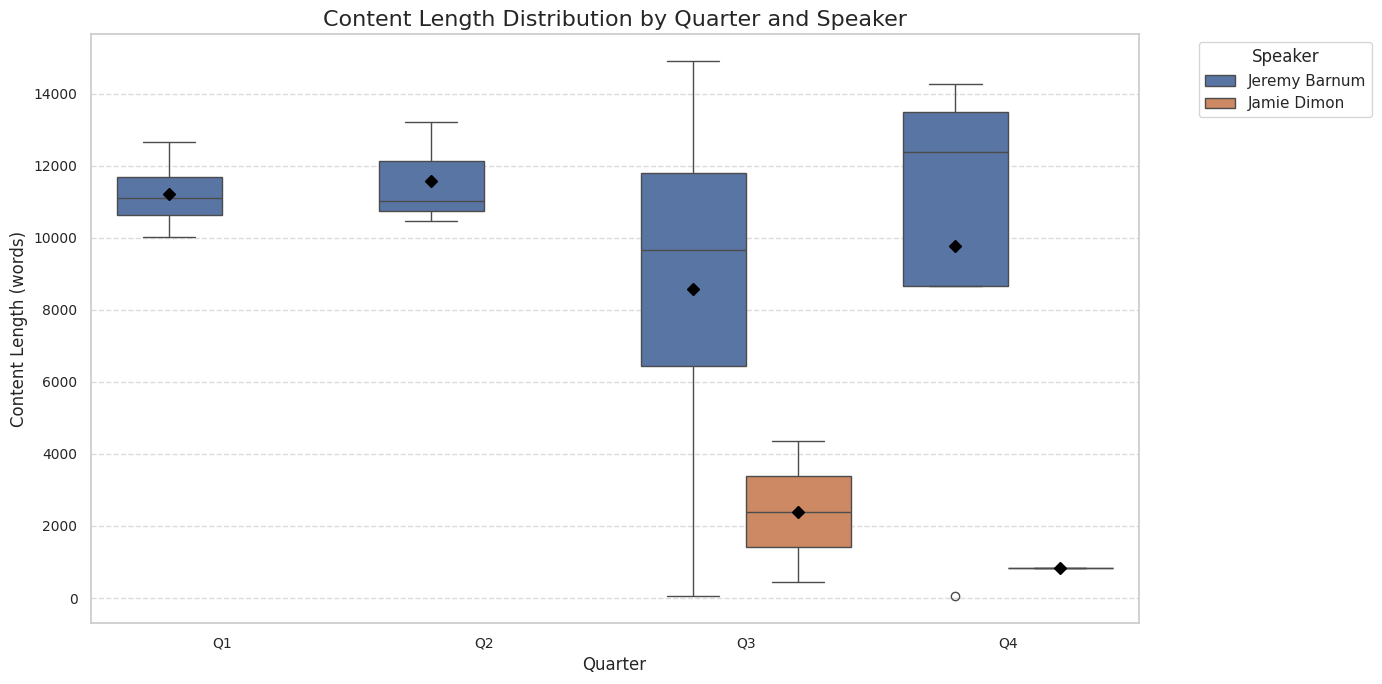

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fix speaker name inconsistencies (trailing + internal whitespace)
df['speaker'] = df['speaker'].str.strip().str.replace(r'\s+', ' ', regex=True)

# 🧹 Filter top 3 speakers for clarity (optional, remove if you want all)
top_speakers = df['speaker'].value_counts().head(3).index.tolist()
df_filtered = df[df['speaker'].isin(top_speakers)]

# 🎨 Custom color palette
custom_palette = {
    "Jeremy Barnum": "#4c72b0",
    "Jamie Dimon": "#dd8452"
}

# 🏷️ Format quarter as labels (Q1, Q2, ...)
df_filtered['quarter_label'] = "Q" + df_filtered['quarter'].astype(str)

# 📊 Plot
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=df_filtered,
    x="quarter_label",
    y="content_length",
    hue="speaker",
    palette=custom_palette,
    showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": "black", "markeredgecolor": "black"},
)

# 🧾 Customize labels and aesthetics
plt.title("Content Length Distribution by Quarter and Speaker", fontsize=16)
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Content Length (words)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Speaker", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Trends Over Time

In [ ]:
# Count entries by year and quarter
df.groupby(['year', 'quarter']).size().unstack(fill_value=0)


quarter,1,2,3,4
year,,,,
2022,1,1,3,1
2023,1,1,2,1
2024,1,1,1,3
2025,1,0,0,0


## Word Count Analysis

In [ ]:
# Add word count column
df['word_count'] = df['content'].apply(lambda x: len(x.split()))
df['word_count'].describe()


,word_count
count,18.000000
mean,1476.444444
std,864.646152
min,8.000000
25%,969.000000
50%,1807.000000
75%,2070.500000
max,2498.000000


## Word Cloud of All Content

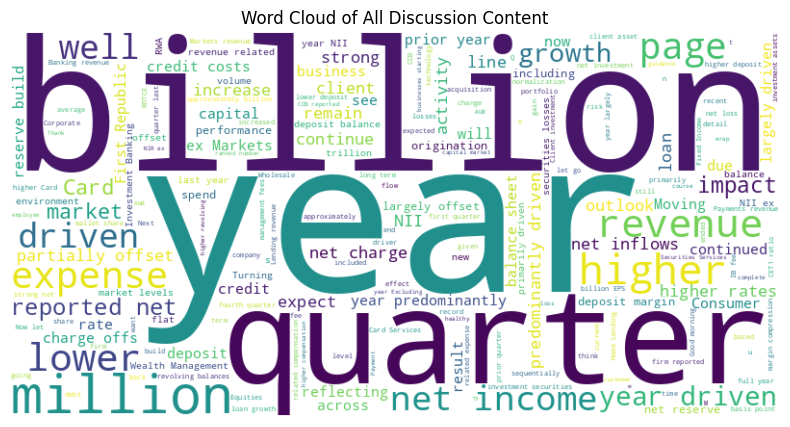

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['content'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Discussion Content")
plt.show()


## Sentiment Analysis

In [ ]:
from textblob import TextBlob

# Compute polarity and subjectivity
df['sentiment_polarity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_subjectivity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Summary
df[['sentiment_polarity', 'sentiment_subjectivity']].describe()


,sentiment_polarity,sentiment_subjectivity
count,18.000000,18.000000
mean,0.128145,0.377541
std,0.119614,0.082811
min,0.050153,0.310508
25%,0.081201,0.332518
50%,0.088873,0.349891
75%,0.107153,0.364894
max,0.542857,0.642857


<ipython-input-21-6caf7d4ec19d>:15: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  ax = sns.boxplot(
<ipython-input-21-6caf7d4ec19d>:37: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


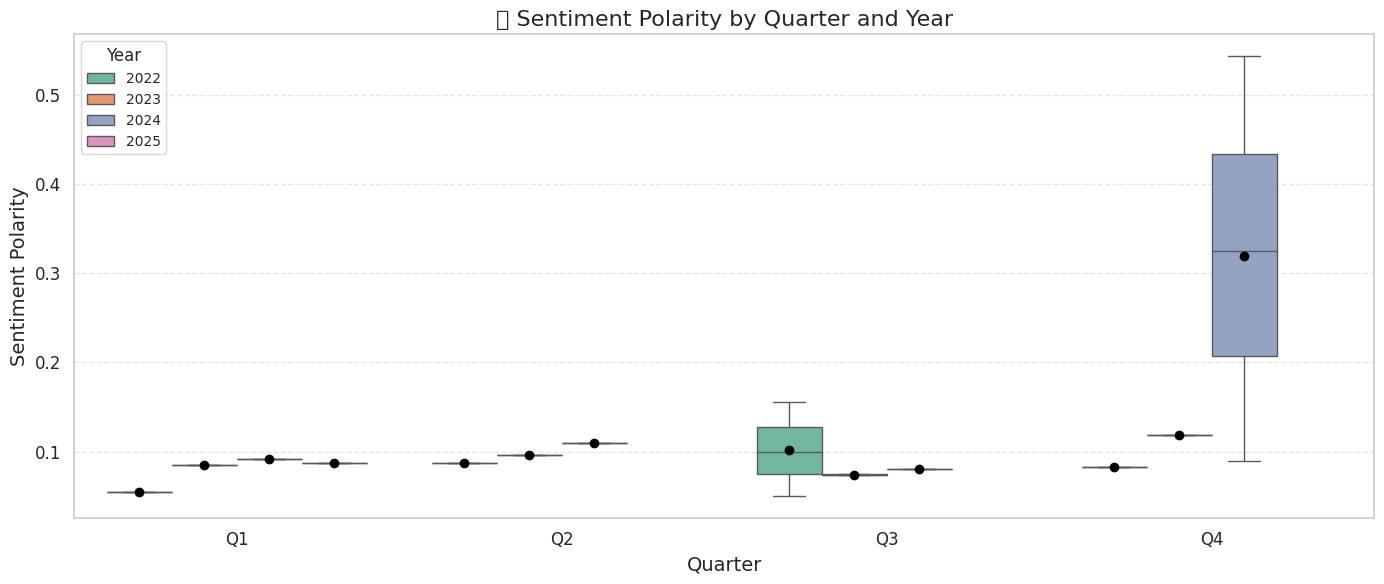

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: convert quarter number to 'Q1', 'Q2', ...
df['quarter_label'] = "Q" + df['quarter'].astype(str)

# Set style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Custom palette (optional)
palette = sns.color_palette("Set2")

# Plot
ax = sns.boxplot(
    data=df,
    x='quarter_label',  # use Q1/Q2...
    y='sentiment_polarity',
    hue='year',
    palette=palette,
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"}
)

# Labels and title
plt.title("🧠 Sentiment Polarity by Quarter and Year", fontsize=16)
plt.xlabel("Quarter", fontsize=14)
plt.ylabel("Sentiment Polarity", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Legend formatting
plt.legend(title='Year', title_fontsize=12, fontsize=10, loc='upper left')

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Key Observations
1. Stable Sentiment in 2022–2023
Q1 to Q3 of 2022 and 2023 show very low and narrow sentiment polarity ranges, hovering roughly between 0.05 and 0.12.

This suggests a neutral to slightly positive tone with little variation—perhaps cautious or consistent language was used.

2. Notable Jump in Q4 2024
There's a large increase in sentiment polarity in Q4 of 2024.

The median is significantly higher (∼0.32), and the range extends up to 0.54, indicating stronger positive tone.

This could reflect optimistic announcements, positive earnings, or market outlook in that quarter.

3. 2025 Data Looks Sparse
Only one or two visible dots for 2025 (especially in Q1/Q2), indicating limited data or transcripts for that year so far.

## 📊 Financial Keywords - Focused Analysis

### Word Cloud: Financial Content Only

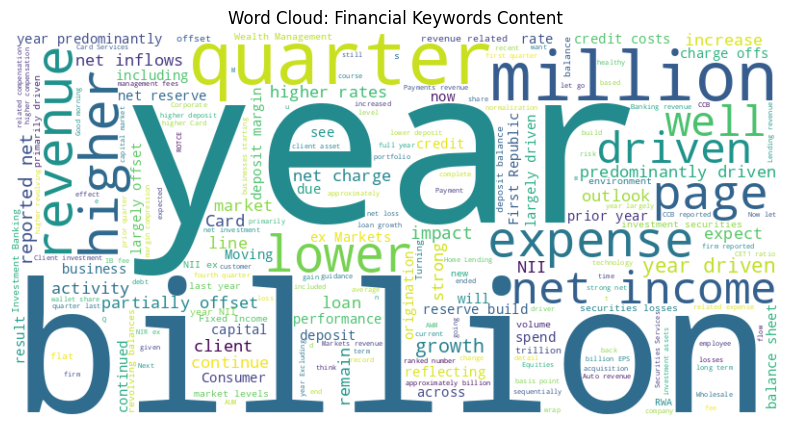

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define financial keywords pattern
financial_keywords = [
    'revenue', 'earnings', 'expenses', 'costs', 'income', 'profit',
    'loss', 'guidance', 'forecast', 'margin', 'capital', 'liquidity',
    'dividend', 'debt', 'loan', 'credit', 'assets', 'liabilities',
    'balance sheet', 'interest', 'net income'
]

# Create a regex pattern
pattern = '|'.join(financial_keywords)

# Filter financial-related content
financial_text_series = df[df['content'].str.contains(pattern, case=False, regex=True, na=False)]['content']
financial_text = " ".join(financial_text_series)

# Generate Word Cloud
wc = WordCloud(width=800, height=400, background_color='white').generate(financial_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Financial Keywords Content")
plt.show()


### Sentiment Analysis: Financial Content

In [ ]:
from textblob import TextBlob

# Filter and compute sentiment on financial content
df['financial_flag'] = df['content'].str.contains(
    '|'.join([
        'revenue', 'earnings', 'expenses', 'costs', 'income', 'profit',
        'loss', 'guidance', 'forecast', 'margin', 'capital', 'liquidity',
        'dividend', 'debt', 'loan', 'credit', 'assets', 'liabilities',
        'balance sheet', 'interest', 'net income'
    ]), case=False, na=False)

financial_df = df[df['financial_flag']].copy()
financial_df['sentiment_polarity'] = financial_df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
financial_df['sentiment_subjectivity'] = financial_df['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

financial_df[['year', 'quarter', 'sentiment_polarity', 'sentiment_subjectivity']]


,year,quarter,sentiment_polarity,sentiment_subjectivity
0,2022,1,0.055377,0.312275
1,2022,2,0.086853,0.365205
2,2022,3,0.050153,0.314174
3,2022,3,0.155436,0.479269
5,2022,4,0.082871,0.349782
6,2023,1,0.084634,0.331646
7,2023,2,0.096073,0.310508
8,2023,3,0.075000,0.468750
9,2023,3,0.073400,0.339993
10,2023,4,0.119017,0.355647


<ipython-input-22-ae43a8406b34>:45: UserWarning: Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


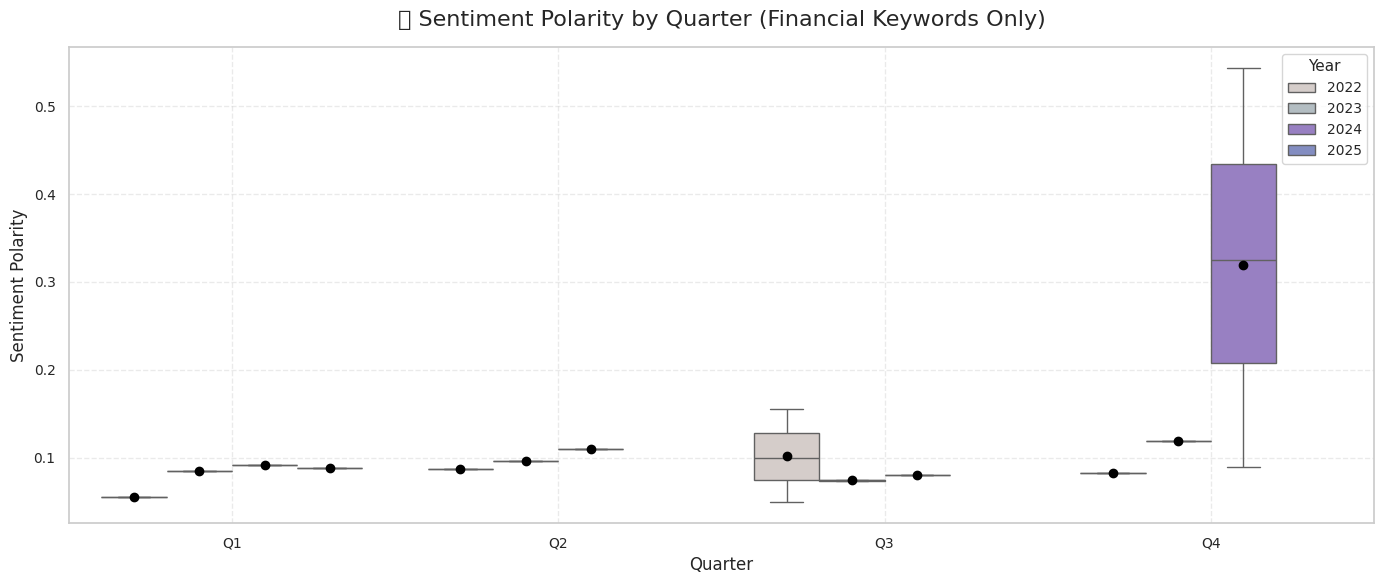

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Create a clearer quarter label
df['quarter_label'] = "Q" + df['quarter'].astype(str)

# Set custom color palette (muted and financial-feel)
palette = {
    2022: "#D7CCC8",  # light taupe
    2023: "#B0BEC5",  # steel grey
    2024: "#9575CD",  # soft violet
    2025: "#7986CB",  # dusty blue
}

plt.figure(figsize=(14, 6))
ax = sns.boxplot(
    data=df,
    x='quarter_label',
    y='sentiment_polarity',
    hue='year',
    palette=palette,
    showmeans=True,
    meanprops={
        "marker": "o",
        "markerfacecolor": "black",
        "markeredgecolor": "black",
        "markersize": 6,
    }
)

# Customize labels and title
ax.set_title("💹 Sentiment Polarity by Quarter (Financial Keywords Only)", fontsize=16, pad=15)
ax.set_xlabel("Quarter", fontsize=12)
ax.set_ylabel("Sentiment Polarity", fontsize=12)
ax.tick_params(axis='both', labelsize=10)

# Legend tweaks
ax.legend(title="Year", title_fontsize=11, fontsize=10)

# Grid and layout
ax.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Key Takeaways from the Plot:
1. Q4 2024 Stands Out Dramatically
Very high sentiment polarity in Q4 of 2024.

The median is around 0.32, and the upper range goes above 0.5 — suggesting a highly positive tone in discussions involving financial terms.

This could be due to strong performance, positive forecasts, or favorable macro/earnings news.

2. Other Quarters (Q1–Q3) Show Much Lower Polarity
From 2022 to 2025, sentiment polarity in Q1–Q3 is relatively stable and consistently low (median values between 0.06–0.11).

Little quarter-over-quarter variability, except in Q3 2022, which shows slightly elevated polarity and a broader range.

3. Sentiment Over Years is Mostly Flat — Until Q4 2024
There is no major jump or drop across years in Q1–Q3.

Suggests that external sentiment triggers (macro trends, leadership tone, etc.) were quarter-specific rather than year-wide.

# Interpretation Suggestions:
Investigate Q4 2024: This quarter is clearly an anomaly — worth checking what happened in earnings, management commentary, or economic conditions.

Keyword-driven positivity: Since this is filtered for financial keywords, the spike in sentiment is likely financially relevant — not just casual optimism.

Consider overlaying events or revenue trends to explain why the sentiment surged in that quarter.

# Suggestions:
Investigate Q4 2024: This quarter is clearly an anomaly — worth checking what happened in earnings, management commentary, or economic conditions.

Keyword-driven positivity: Since this is filtered for financial keywords, the spike in sentiment is likely financially relevant — not just casual optimism.

Consider overlaying events or revenue trends to explain why the sentiment surged in that quarter.

## 🧹 Data Cleaning: Boilerplate and Custom Stopwords

In [ ]:
import re

# Boilerplate removal patterns
boilerplate_patterns = [
    r'^thanks, operator[.,]?', r'^good (morning|afternoon|evening)[.,]?',
    r'^thank you( very much)?[.,]?', r'^hi everyone[.,]?', r'^welcome( to.*)?[.,]?',
    r'^okay[.,]?', r'^all right[.,]?', r'^let me start by saying[.,]?'
]
combined_pattern = re.compile(r'|'.join(boilerplate_patterns), re.IGNORECASE)

def clean_boilerplate(text):
    return combined_pattern.sub('', text).strip()

# Custom domain stopwords
custom_stopwords = {
    'operator', 'thank', 'thanks', 'morning', 'afternoon', 'evening',
    'okay', 'welcome', 'everyone', 'hi', 'start', 'saying', 'speak', 'speaking'
}

def remove_custom_stopwords(text):
    words = text.lower().split()
    filtered = [word for word in words if word not in custom_stopwords]
    return ' '.join(filtered)

df['content_clean'] = df['content'].apply(clean_boilerplate).apply(remove_custom_stopwords)


## 📊 N-gram Analysis: Top Bigrams and Trigrams

<ipython-input-17-7aea6ace7655>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ngram_df, x='count', y='ngram', palette='Blues_d')


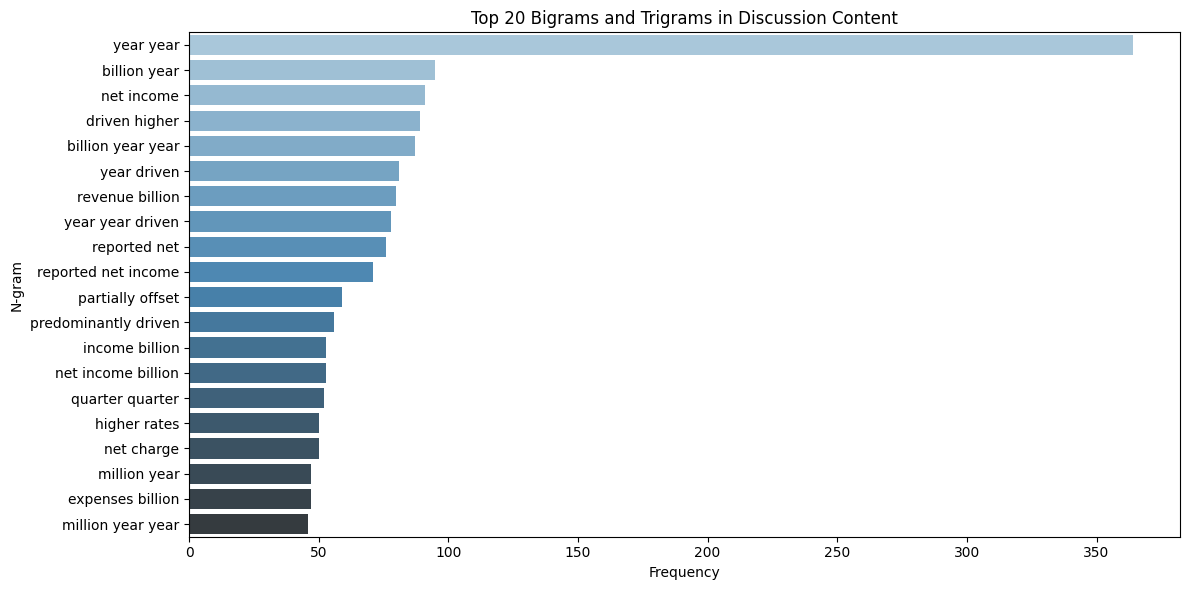

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english', min_df=2)
X = vectorizer.fit_transform(df['content_clean'])

sum_words = X.sum(axis=0)
ngram_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)
top_ngram_df = pd.DataFrame(ngram_freq[:20], columns=['ngram', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(data=top_ngram_df, x='count', y='ngram', palette='Blues_d')
plt.title("Top 20 Bigrams and Trigrams in Discussion Content")
plt.xlabel("Frequency")
plt.ylabel("N-gram")
plt.tight_layout()
plt.show()


# Key Observations:
- Most Frequent Phrases:

"year year", "billion year", and "net income" are the top phrases. Like earlier charts, "year year" is likely a text preprocessing artifact (should be filtered out).

"net income", "revenue billion", "reported net income", and "income billion" suggest core financial reporting terms dominate the narrative.

- Performance Drivers:

"driven higher", "predominantly driven", "year driven" indicate a pattern of explaining performance changes, i.e., identifying what "drove" results.

This aligns with earnings call practices where companies explain positive/negative variances.

- Financial Metrics Focus:

Frequent trigrams and bigrams like:

"reported net income"

"expenses billion"

"net charge"

"higher rates"

"partially offset"

...suggest heavy focus on:

Revenue/expense structure,

Macroeconomic factors (e.g., rates),

Charges and one-offs,

Management’s breakdown of line items.

- Temporal or Redundant Terms:

"quarter quarter", "year year driven", "million year year" likely require cleaning — they don’t add analytical value and may result from repetitive phrasing or parsing issues.

# Interpretation for JP Morgan:

The discussion content is metrics-heavy and explanation-oriented.

Sentiment framing likely revolves around performance justifications:

“driven higher”, “partially offset”, “predominantly driven”

Pairs well with sentiment analysis or summarization focused on drivers of performance.

<ipython-input-24-ad2452aab322>:30: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  stock_quarterly = stock_hist['Close'].resample('Q').last().pct_change() * 100
<ipython-input-24-ad2452aab322>:34: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  stock_quarterly['quarter_year'] = stock_quarterly['Date'].dt.to_period('Q')
<ipython-input-24-ad2452aab322>:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
<ipython-input-24-ad2452aab322>:64: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


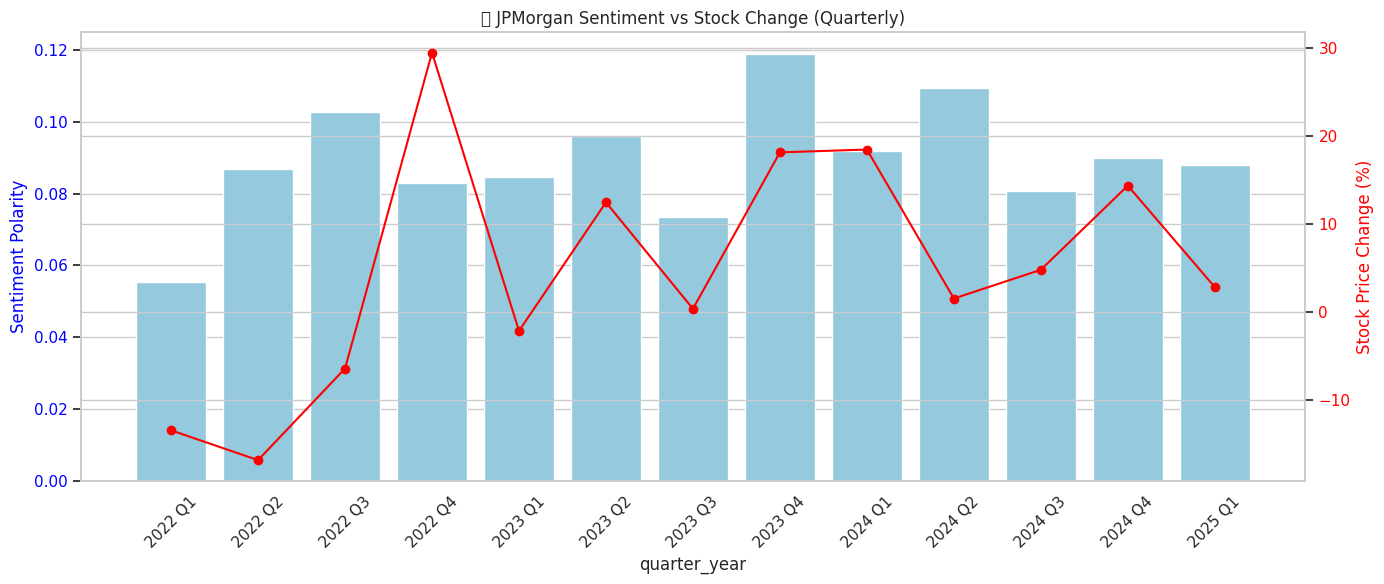

In [ ]:
# 📦 Install yfinance (if needed)
!pip install yfinance

# 📚 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from textblob import TextBlob

# 📥 2. Load Sentiment Data
discussion_df = pd.read_csv("discussion_df.csv")

# 🧹 3. Filter: Financial Keywords and Clean
financial_keywords = ["net income", "interest expense", "capital", "revenue", "credit", "loan"]
discussion_df["text_lower"] = discussion_df["content"].str.lower()
discussion_df = discussion_df[discussion_df["text_lower"].str.contains('|'.join(financial_keywords))]

# 💬 4. Sentiment Polarity
discussion_df["sentiment_polarity"] = discussion_df["content"].apply(lambda x: TextBlob(x).sentiment.polarity)

# 🏷️ 5. Quarter-Year Label
discussion_df["quarter_year"] = discussion_df["year"].astype(str) + " Q" + discussion_df["quarter"].astype(str)

# 📈 6. Download JPM stock data and compute quarterly percent change
jpm = yf.Ticker("JPM")
stock_hist = jpm.history(period="5y", interval="1d")

# Resample to quarterly, compute percent change
stock_quarterly = stock_hist['Close'].resample('Q').last().pct_change() * 100
stock_quarterly = stock_quarterly.reset_index()

# Create 'quarter_year' format
stock_quarterly['quarter_year'] = stock_quarterly['Date'].dt.to_period('Q')
stock_quarterly['quarter_year'] = stock_quarterly['quarter_year'].apply(lambda x: f"{x.year} Q{x.quarter}")

# Rename and prepare final DataFrame
stock_df = stock_quarterly[['quarter_year', 'Close']].rename(columns={'Close': 'stock_change_pct'})

# 📊 7. Compute Sentiment by Quarter
sentiment_summary = discussion_df.groupby("quarter_year")["sentiment_polarity"].mean().reset_index()
sentiment_summary.columns = ["quarter_year", "mean_sentiment"]

# 🔗 8. Merge sentiment and stock data
merged_df = pd.merge(sentiment_summary, stock_df, on="quarter_year", how="left")

# 📉 9. Plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar plot for sentiment
sns.barplot(data=merged_df, x="quarter_year", y="mean_sentiment", color='skyblue', ax=ax1)
ax1.set_ylabel("Sentiment Polarity", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title("🧠 JPMorgan Sentiment vs Stock Change (Quarterly)")

# Line plot for stock % change
ax2 = ax1.twinx()
ax2.plot(merged_df["quarter_year"], merged_df["stock_change_pct"], color='red', marker='o', label="Stock % Change")
ax2.set_ylabel("Stock Price Change (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Layout
fig.tight_layout()
plt.show()

# General Correlation:

There appears to be a loose positive relationship: quarters with higher sentiment polarity tend to correspond with positive stock price changes.

However, this relationship is not consistent, suggesting other factors (e.g., macroeconomic conditions, guidance, market expectations) also play strong roles.

- Notable Quarters:

2022 Q4:

Sentiment: Moderate (~0.085).

Stock Price Change: Spiked dramatically to nearly +30% — possibly due to external surprise factors.

2023 Q4:

Highest sentiment (~0.12) and strong positive stock response (~18%) — strong alignment here.

2022 Q2:

Low sentiment (0.06) and negative stock movement ( -10%) — a clearer match.

2024 Q1 & Q2:

Moderate to high sentiment, yet muted stock response — indicates possible expectation mismatch or neutral market reaction.

- Recent Period (2024–2025):

Sentiment is relatively stable, but stock price changes fluctuate, with a dip in 2025 Q1 despite decent sentiment — possibly reflecting uncertainty or conservative guidance.

# Interpretation:

Sentiment polarity from management discussions can signal directional cues, but isn't a standalone predictor.

Market reaction is partially sentiment-driven, but modulated by:

Expectations vs. actuals,

Broader economic news (interest rates, inflation, etc.),

Market sentiment toward financial sector as a whole.